In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#TL pecific modules
from keras.applications.vgg16 import VGG16

In [2]:
import os
print(os.listdir('/content/drive/MyDrive/Flowers'))

['daisy', 'dandelion', 'tulip', 'sunflower', 'rose']


In [3]:
Dir = '/content/drive/MyDrive/Flowers'

In [4]:
categories=['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

In [5]:
Daisy_flower_dir = '/content/drive/MyDrive/Flowers/daisy'
Sunflower_flower_dir = '/content/drive/MyDrive/Flowers/sunflower'
Tulip_flower_dir = '/content/drive/MyDrive/Flowers/tulip'
Dandelion_flower_dir = '/content/drive/MyDrive/Flowers/dandelion'
Rose_flower_dir = '/content/drive/MyDrive/Flowers/rose'

In [6]:
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  Dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4323 files belonging to 5 classes.
Using 3459 files for training.


In [7]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  Dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4323 files belonging to 5 classes.
Using 864 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


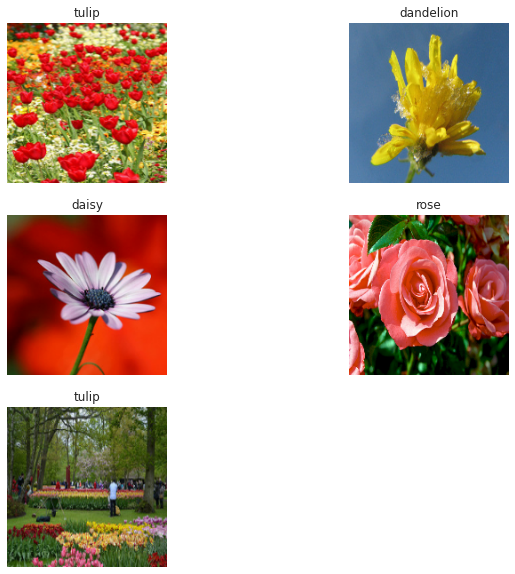

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(5):
    ax = plt.subplot(3, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [11]:
  AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
from tensorflow.keras import layers
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9939845


#ANN

In [17]:
model = Sequential([
        layers.Flatten(input_shape=(180,180,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(5, activation='softmax')    
    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
109/109 [==============================] - 8s 66ms/step - loss: 20948.1011 - accuracy: 0.2419 - val_loss: 467.8661 - val_accuracy: 0.2500
Epoch 2/50
109/109 [==============================] - 7s 64ms/step - loss: 233.9911 - accuracy: 0.3657 - val_loss: 77.3456 - val_accuracy: 0.3854
Epoch 3/50
109/109 [==============================] - 7s 64ms/step - loss: 43.6216 - accuracy: 0.3896 - val_loss: 26.5130 - val_accuracy: 0.3252
Epoch 4/50
109/109 [==============================] - 7s 64ms/step - loss: 18.9919 - accuracy: 0.3519 - val_loss: 2.7611 - val_accuracy: 0.2500
Epoch 5/50
109/109 [==============================] - 7s 64ms/step - loss: 2.4698 - accuracy: 0.2460 - val_loss: 1.8455 - val_accuracy: 0.2488
Epoch 6/50
109/109 [==============================] - 7s 64ms/step - loss: 1.7388 - accuracy: 0.2461 - val_loss: 1.6711 - val_accuracy: 0.2373
Epoch 7/50
109/109 [==============================] - 7s 64ms/step - loss: 1.5935 - accuracy: 0.2478 - val_loss: 1.6683 - val_accu

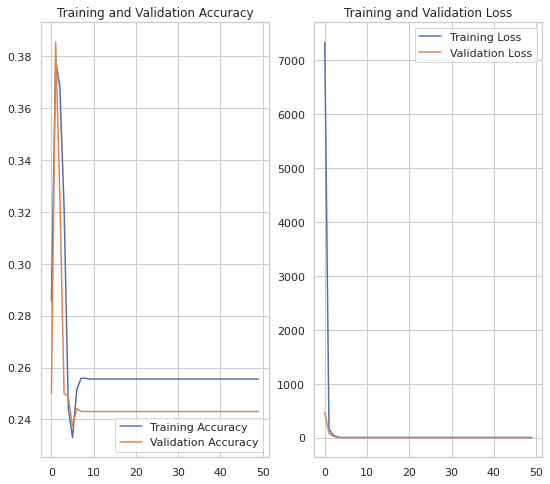

In [20]:
epochs =50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
X=[]
y=[]
for i,j in val_ds:
    X.append(i)
    y.append(j)
y=np.array(y).reshape(-1)

In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(val_ds)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.17      0.71      0.27       147
           1       0.00      0.00      0.00       208
           2       0.10      0.18      0.13       135
           3       0.00      0.00      0.00       171
           4       0.00      0.00      0.00       203

    accuracy                           0.15       864
   macro avg       0.05      0.18      0.08       864
weighted avg       0.04      0.15      0.07       864



In [19]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (180,180,3)),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  layers.Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [135]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [136]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_8 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 180, 180, 32)      2432      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 45, 45, 96)        55392     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 22, 22, 96)      

In [137]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
109/109 [==============================] - 7s 60ms/step - loss: 1.9237 - accuracy: 0.3543 - val_loss: 1.1638 - val_accuracy: 0.5150
Epoch 2/50
109/109 [==============================] - 4s 40ms/step - loss: 1.0904 - accuracy: 0.5591 - val_loss: 0.9464 - val_accuracy: 0.6215
Epoch 3/50
109/109 [==============================] - 4s 40ms/step - loss: 0.8601 - accuracy: 0.6543 - val_loss: 0.9165 - val_accuracy: 0.6400
Epoch 4/50
109/109 [==============================] - 4s 40ms/step - loss: 0.6826 - accuracy: 0.7436 - val_loss: 0.9978 - val_accuracy: 0.6470
Epoch 5/50
109/109 [==============================] - 4s 40ms/step - loss: 0.4204 - accuracy: 0.8544 - val_loss: 1.3092 - val_accuracy: 0.5891
Epoch 6/50
109/109 [==============================] - 4s 40ms/step - loss: 0.2796 - accuracy: 0.9125 - val_loss: 1.4098 - val_accuracy: 0.5903
Epoch 7/50
109/109 [==============================] - 4s 40ms/step - loss: 0.1747 - accuracy: 0.9420 - val_loss: 1.4312 - val_accuracy: 0.6273

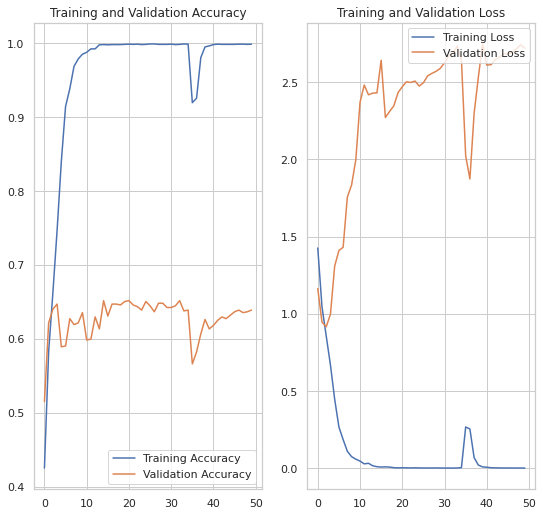

In [138]:
epochs =50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:

from tensorflow import keras
data_augmentation = keras.Sequential(
  [
   #layers.experimental.preprocessing.Resizing(img_height,img_width, interpolation='bilinear'),
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
       layers.experimental.preprocessing.RandomFlip("vertical", 
                                                input_shape=(img_height, 
                                                             img_width,
                                                             3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
   layers.experimental.preprocessing.RandomContrast(0.3),
   layers.experimental.preprocessing.RandomCrop(img_height,img_width),
   #layers.experimental.preprocessing.RandomHeight(0.1)

  ]
)

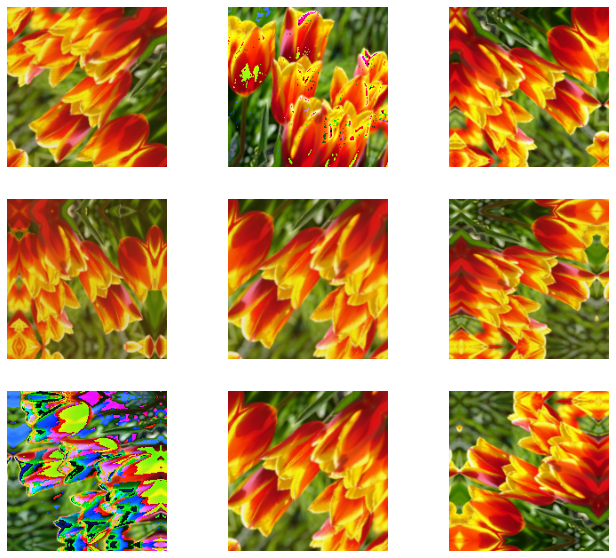

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [26]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (180,180,3)),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.BatchNormalization(),
  layers.Dropout(0.2),
  layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.Conv2D(filters =256, kernel_size = (3,3),padding = 'Same',activation ='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.5),
  layers.Dense(num_classes, activation='softmax')
])

In [27]:
model.compile(optimizer=Adam(lr=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 90, 90, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 64)       

In [29]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100
)

Epoch 1/100
109/109 [==============================] - 8s 55ms/step - loss: 2.2202 - accuracy: 0.3416 - val_loss: 1.9314 - val_accuracy: 0.2407
Epoch 2/100
109/109 [==============================] - 5s 48ms/step - loss: 1.6267 - accuracy: 0.4211 - val_loss: 2.6176 - val_accuracy: 0.2396
Epoch 3/100
109/109 [==============================] - 5s 49ms/step - loss: 1.3966 - accuracy: 0.4799 - val_loss: 1.9763 - val_accuracy: 0.2917
Epoch 4/100
109/109 [==============================] - 5s 49ms/step - loss: 1.3016 - accuracy: 0.4862 - val_loss: 1.4038 - val_accuracy: 0.3993
Epoch 5/100
109/109 [==============================] - 5s 49ms/step - loss: 1.2393 - accuracy: 0.5336 - val_loss: 1.3133 - val_accuracy: 0.4410
Epoch 6/100
109/109 [==============================] - 5s 48ms/step - loss: 1.0891 - accuracy: 0.5799 - val_loss: 1.4125 - val_accuracy: 0.3981
Epoch 7/100
109/109 [==============================] - 5s 48ms/step - loss: 1.2323 - accuracy: 0.5211 - val_loss: 1.0578 - val_accuracy:

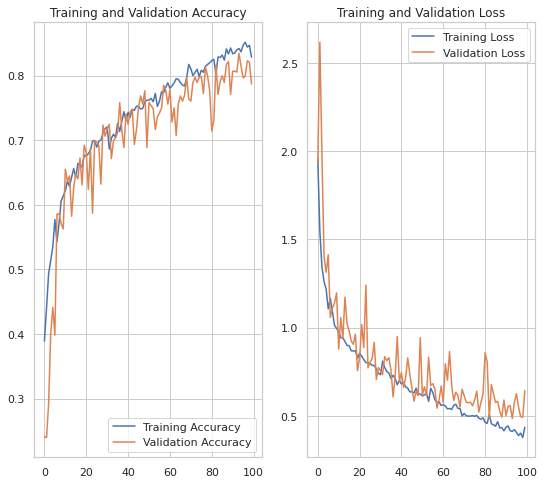

In [30]:
epochs =100
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [33]:
score = model.evaluate(val_ds)
model.save("cnn.model") # save model

27/27 [==============================] - 0s 17ms/step - loss: 0.6422 - accuracy: 0.7870
INFO:tensorflow:Assets written to: cnn.model/assets


In [34]:
score = model.evaluate(train_ds)
model.save("cnn.model") # save model

109/109 [==============================] - 2s 15ms/step - loss: 0.4829 - accuracy: 0.8216
INFO:tensorflow:Assets written to: cnn.model/assets


In [35]:
pred=model.predict(val_ds)
pred_digits=np.argmax(pred,axis=1)

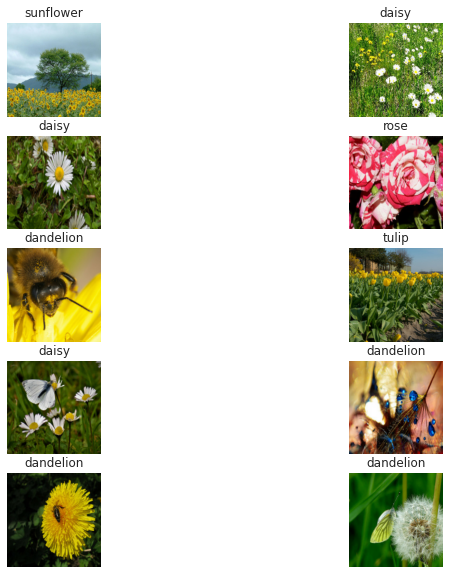

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(10):
    ax = plt.subplot(5, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [37]:
pred[:5]

array([[4.7401218e-03, 5.0327188e-01, 5.9195282e-03, 2.6297203e-01,
        2.2309643e-01],
       [9.9913931e-01, 7.0838776e-04, 1.9746021e-05, 1.6733031e-05,
        1.1577922e-04],
       [9.9977189e-01, 1.9581284e-04, 2.8679204e-05, 1.9514655e-06,
        1.7056669e-06],
       [2.6583814e-03, 6.7946321e-04, 7.0553344e-01, 3.9304572e-04,
        2.9073566e-01],
       [2.7894668e-02, 6.7600334e-01, 6.5615843e-04, 2.8220883e-01,
        1.3237033e-02]], dtype=float32)

In [38]:
pred_digits

array([1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 4, 3, 2, 3, 3, 0, 4, 1, 0, 1, 4, 3,
       4, 3, 0, 2, 3, 1, 1, 0, 4, 1, 2, 0, 2, 4, 3, 4, 0, 3, 3, 0, 1, 4,
       4, 3, 3, 1, 3, 2, 0, 4, 2, 0, 1, 1, 3, 4, 1, 1, 4, 1, 4, 2, 1, 1,
       1, 2, 4, 1, 1, 4, 1, 1, 0, 4, 1, 3, 1, 2, 3, 1, 0, 4, 3, 3, 1, 0,
       1, 3, 4, 2, 0, 4, 3, 4, 1, 1, 1, 3, 1, 2, 3, 1, 4, 1, 4, 4, 4, 4,
       4, 2, 2, 1, 1, 4, 1, 4, 1, 0, 0, 1, 0, 1, 4, 3, 4, 1, 0, 4, 3, 0,
       1, 4, 0, 2, 0, 4, 4, 2, 1, 0, 0, 1, 2, 2, 4, 1, 4, 4, 1, 3, 4, 3,
       0, 3, 3, 3, 1, 1, 4, 4, 3, 0, 1, 2, 0, 0, 1, 2, 4, 4, 1, 3, 2, 1,
       2, 1, 3, 4, 4, 1, 4, 1, 0, 1, 3, 3, 4, 4, 4, 4, 1, 4, 4, 1, 1, 4,
       1, 4, 4, 0, 0, 1, 4, 0, 1, 1, 1, 1, 3, 3, 2, 4, 3, 3, 2, 2, 1, 1,
       0, 1, 4, 4, 1, 4, 2, 4, 1, 0, 0, 0, 0, 1, 2, 3, 4, 1, 3, 4, 1, 4,
       0, 4, 4, 1, 0, 4, 4, 2, 3, 1, 1, 4, 1, 4, 4, 1, 2, 2, 1, 0, 3, 2,
       1, 3, 2, 2, 4, 0, 1, 4, 1, 1, 4, 3, 1, 1, 1, 1, 4, 2, 4, 1, 4, 1,
       3, 4, 3, 4, 4, 1, 3, 4, 4, 2, 0, 0, 2, 4, 4,

In [39]:
pred[0,0]

0.004740122

In [40]:
X=[]
y=[]
for i,j in val_ds:
    X.append(i)
    y.append(j)

In [41]:
y=np.array(y).reshape(-1)

In [42]:
y

array([3, 0, 0, 2, 1, 4, 0, 1, 1, 1, 4, 0, 2, 3, 1, 0, 4, 1, 0, 1, 4, 3,
       4, 3, 0, 4, 3, 1, 1, 0, 2, 3, 2, 0, 2, 2, 3, 4, 0, 3, 3, 0, 1, 3,
       4, 3, 3, 1, 3, 2, 0, 4, 2, 0, 0, 2, 3, 4, 1, 1, 4, 1, 2, 2, 3, 3,
       1, 2, 2, 1, 1, 2, 1, 1, 0, 4, 1, 3, 1, 2, 3, 1, 0, 2, 3, 3, 1, 0,
       0, 1, 4, 2, 0, 2, 3, 4, 1, 1, 4, 3, 1, 1, 3, 1, 4, 1, 2, 4, 4, 4,
       4, 2, 2, 3, 0, 4, 0, 4, 1, 0, 0, 3, 0, 1, 4, 3, 4, 1, 0, 4, 3, 0,
       4, 4, 0, 2, 0, 4, 4, 2, 1, 0, 0, 1, 2, 2, 4, 0, 4, 4, 4, 3, 4, 3,
       0, 3, 3, 3, 1, 4, 4, 1, 3, 0, 1, 2, 0, 0, 2, 2, 4, 4, 3, 3, 2, 4,
       2, 2, 3, 4, 4, 1, 2, 3, 0, 1, 3, 3, 4, 4, 4, 2, 1, 4, 2, 1, 1, 4,
       1, 2, 4, 0, 0, 1, 4, 0, 3, 1, 4, 1, 3, 3, 4, 4, 3, 3, 2, 2, 1, 1,
       0, 3, 4, 4, 1, 4, 4, 4, 0, 0, 0, 0, 0, 3, 2, 3, 3, 3, 3, 0, 0, 4,
       0, 4, 4, 1, 0, 4, 2, 2, 3, 1, 3, 4, 1, 4, 4, 1, 4, 2, 1, 0, 3, 2,
       1, 3, 4, 2, 4, 0, 1, 4, 1, 1, 3, 3, 1, 1, 1, 1, 4, 2, 4, 1, 0, 1,
       3, 2, 3, 4, 4, 3, 3, 2, 4, 2, 0, 0, 4, 4, 4,

In [43]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y, pred_digits))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.71      0.82       147
           1       0.69      0.95      0.80       208
           2       0.81      0.59      0.68       135
           3       0.92      0.77      0.84       171
           4       0.73      0.82      0.77       203

    accuracy                           0.79       864
   macro avg       0.82      0.77      0.78       864
weighted avg       0.81      0.79      0.79       864



In [44]:
pred_digits[:5]

array([1, 0, 0, 2, 1])

In [45]:
y[:5]

array([3, 0, 0, 2, 1], dtype=int32)